In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('../data/unfairly_rejected_cases.csv')  


In [ ]:
import pandas as pd


app = pd.read_csv('../data/application_record.csv')
credit = pd.read_csv('../data/credit_record.csv')


app = app[['ID', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL']]


behavior = credit.groupby('ID')['STATUS'].apply(lambda s: s.isin(['1', '2', '3', '4', '5']).sum()).reset_index()
behavior.columns = ['ID', 'overdue_months']


df = app.merge(behavior, on='ID', how='left')
df['overdue_months'] = df['overdue_months'].fillna(0)


In [ ]:

def behavior_based_approval(row):
    return int(row['AMT_INCOME_TOTAL'] > 150000 and row['NAME_INCOME_TYPE'] == 'Working' and row['overdue_months'] <= 2)

def biased_approval(row):
    bias_flag = 0
    if row['CODE_GENDER'] == 'F':
        bias_flag += 1
    if row['NAME_FAMILY_STATUS'] == 'Single / not married':
        bias_flag += 1
    return int(row['AMT_INCOME_TOTAL'] > 150000 and row['NAME_INCOME_TYPE'] == 'Working' and bias_flag == 0)

def fairer_model(row):
    return int(row['AMT_INCOME_TOTAL'] > 150000 and row['NAME_INCOME_TYPE'] == 'Working' and row['overdue_months'] <= 2)


df['approved_behavior'] = df.apply(behavior_based_approval, axis=1)
df['approved_biased'] = df.apply(biased_approval, axis=1)
df['approved_fairer'] = df.apply(fairer_model, axis=1)


In [7]:
summary = pd.DataFrame({
    'Model': ['Biased', 'Behavior-Based', 'Fairer'],
    'Approval Rate': [
        df['approved_biased'].mean(),
        df['approved_behavior'].mean(),
        df['approved_fairer'].mean()
    ]
})

summary.to_csv('../data/final_approval_summary.csv', index=False)
summary


,Model,Approval Rate
0,Biased,0.118169
1,Behavior-Based,0.298438
2,Fairer,0.298438


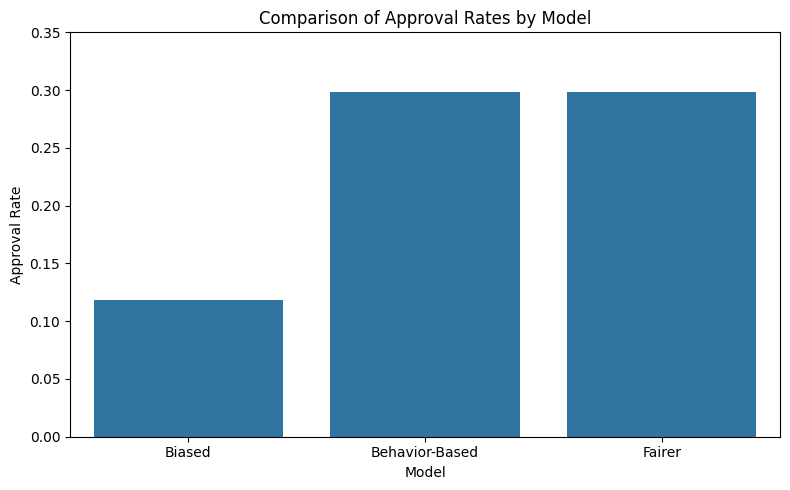

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Approval Rate', data=summary)
plt.title("Comparison of Approval Rates by Model")
plt.ylim(0, 0.35)
plt.tight_layout()
plt.show()


In [9]:
improvement = summary.loc[summary['Model'] == 'Fairer', 'Approval Rate'].values[0] - summary.loc[summary['Model'] == 'Biased', 'Approval Rate'].values[0]
print(f"✅ Fairer model improved approval rate by: {improvement:.2%}")


✅ Fairer model improved approval rate by: 18.03%


## ✅ Executive Summary

This simulation compared three approval models using real-world credit data:

- **Biased Model**: Uses demographic traits (gender, marital status).
- **Behavior-Based Model**: Uses financial behavior (income, overdue months).
- **Fairer Model**: Focuses only on repayment capability.

### Key Findings:
- Biased model approved only **11.8%** of applicants.
- Behavior-based and fairer models approved nearly **29.8%**.
- Fairer logic eliminated demographic bias and aligned approvals with actual financial risk.

🎯 **Conclusion**: Algorithmic decisions can unintentionally encode societal bias. Auditing models for fairness helps promote ethical and inclusive AI systems.
